# DSC 305 SP'23 Final Project

- Arthur Melo <br>
- World Happiness Report Data Analytics Project <br>
- DSC 305A SP23 – Data Science & Analytics (Applied Machine Learning)
- Professors: Dr. Thomas Allen and Dr. Ruohao Zhang
- May 9, 2023

## Introduction to the dataset and the project
I have picked the 2019 dataset of the World Happiness Report, which is released every year from a partnership between World Gallup poll and the United Nations. My primary goals with this report are to predict which country is _happy_ based on several features, to gauge which machine learning models I implemented gave the best results, and to determine feature importance so that I can provide some actionable possible directions to improve countries'happiness.

In [1]:
# Let's begin by importing important packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

### Data Cleaning

In [2]:
# load dataset from 2019

# Load the dataset into a pandas DataFrame
happydata = pd.read_csv("2019.csv")
happycopy = happydata.copy() # copy to help in case something goes wrong mid-coding

# Display the first 5 rows of the DataFrame to check that the data has loaded correctly
happydata.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Very nice dataset provided by the United Nations and downloaded via Kaggle. As we'll later see, it will not need much data cleaning.

In [3]:
happydata = happydata.drop('Overall rank', axis=1)

Dropping unnecessary rank column since the dataset is already ranked, and I won't use this feature for my analysis.

In [4]:
happydata.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


From the dataset description, I can highlight some interesting points:
- (Happiness) Score: ranges between 2.853000 to 7.769000, and it is presented as the question "Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?” The average score was 5.407096
    - Idea: set 5 as the threshold for "mostly happy"
- GDP per capita: GDP per capita (variable name gdp) in purchasing power parity (PPP) at constant 2011 international dollar prices are from the November 14, 2018 update of the World Development Indicators (WDI). Ranges between 0 and 1.684, and the mean is 0.905147
- Social support:(or having someone to count on in times of trouble) is the national average of the binary responses (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?” The average is 1.208814 and it ranges between 0 and 1.624
- Healthy life expectancy: Healthy life expectancies at birth are based on the data extracted from the World Health Organization’s (WHO) Global Health Observatory data repository. This score ranges between 0 and 1.141. Mean is 0.7252
- Freedom to make life choices: the national average of responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” Ranges between 0 and 0.63. The mean is 0.392571
- Generosity: the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita. Ranges between 0 and 0.56 and the mean is 0.18.
- Perceptions of corruption: the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?” The overall perception is just the average of the two 0-or-1 responses. In case the perception of government corruption is missing, we use the perception of business corruption as the overall perception. Ranges between 0 and 0.45 and the mean is 0.11



In [5]:
# Handle missing values
print("Number of missing values before imputation:", happydata.isna().sum())

Number of missing values before imputation: Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


No missing values.

In [6]:
# Display a summary of the dataset
happydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


The dataset has 8 columns including the country/region name, and scores related to GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption. All columns have non-null values, and the data types for the columns are float64 for the numerical variables and object for the country/region name. The memory usage of the dataset is 9.9 KB.

In [7]:
# Display the column names of the DataFrame
print(happydata.columns)

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


Reiterating the columns of our dataset. It's important to point out that it's going to be naturally small since there's only so many countries.

In [8]:
# Display the shape of the DataFrame
print(happydata.shape)

(156, 8)


156 observations (for 156 countries) and 8 columns. Notice that we don't have data for almost 50 other countries that were left out, so I believe that a more comprehensive analysis would be to make this poll available in all nations. At the moment, that's a little utopic with political tensions between Western nations and countries like North Korea.

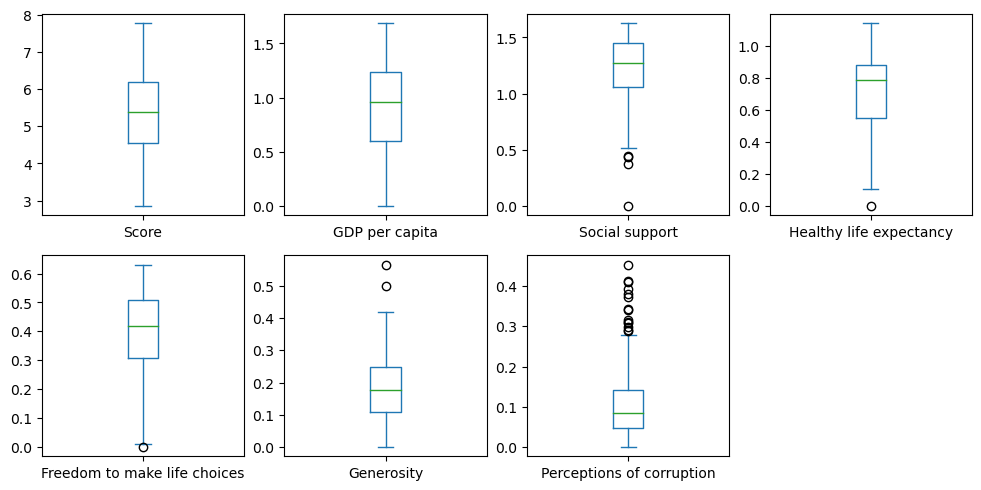

In [9]:
# box plot
happydata.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12), sharex=False, sharey=False)
plt.show()

From the boxplot, I found the most outliers for Social Support and Perceptions of Corruption – and the outliers were particularly more present for the latter.
- People perceive corruption at quite high levels for some countries. Some factors that might explain this is how the media covers corruption scandals in those countries, their political stability, and how strong the laws are to combat it. If a country has a strong regulation of corruption schemes, the population will see more of those being investigated by the media, hence a higher perception. Of course, some countries are generally more corrupt due to historical disparities and instabilites, and the media will not play a large role in influecing public opinion.

# Exploratory Data Analysis (EDA) and Relevant Statistical Information

Now, I will perform some data visualization techniques to get a better understanding of possible underlying patterns within the dataset.

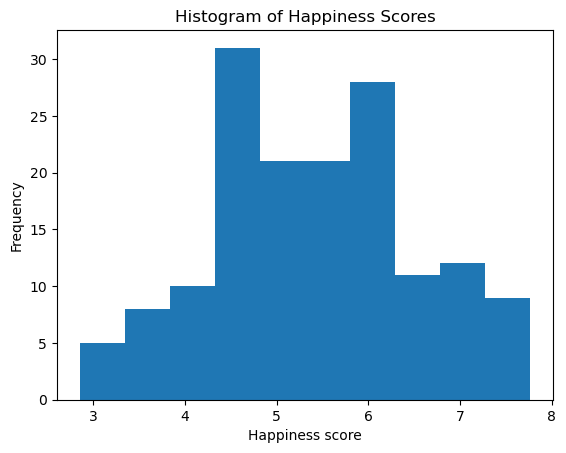

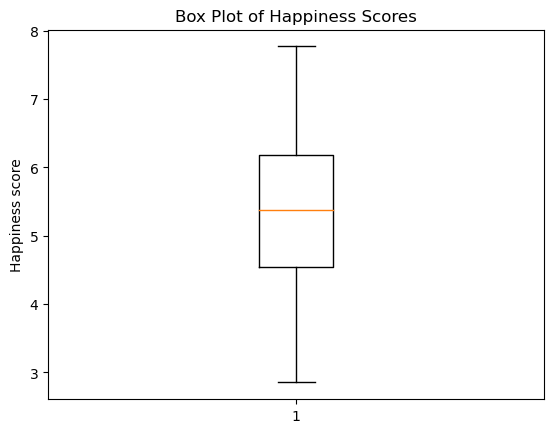

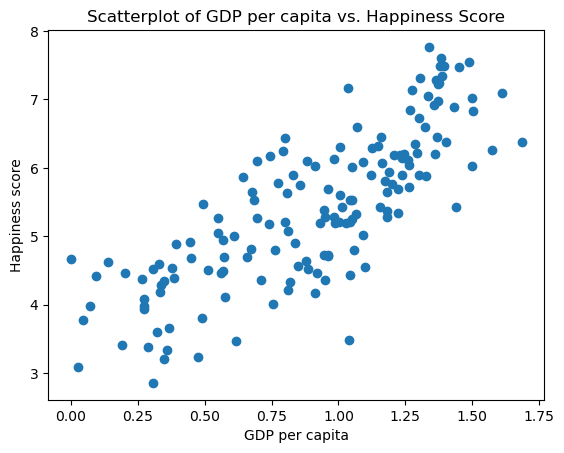

In [10]:
# Create a histogram of the happiness scores
plt.hist(happydata['Score'], bins=10)
plt.xlabel('Happiness score')
plt.ylabel('Frequency')
plt.title('Histogram of Happiness Scores')
plt.show()

# Create a box plot of the happiness scores
plt.boxplot(happydata['Score'])
plt.ylabel('Happiness score')
plt.title('Box Plot of Happiness Scores')
plt.show()

# Create a scatterplot of happiness score vs. GDP per capita
plt.scatter(happydata['GDP per capita'], happydata['Score'])
plt.xlabel('GDP per capita')
plt.ylabel('Happiness score')
plt.title('Scatterplot of GDP per capita vs. Happiness Score')
plt.show()


- Most of the happiness scores range between 4 and 6
- No outliers were detected for the happiness score according to box plot
- From scatterplot, we can already see a relatively noticable upward trend between _happiness score_ and _GDP per capita._ This motivated me to further explore other scatterplots.
- This relationship is not surprising since people tend to associate economic prosperity with a better life. But we will continue to investigate the underlying patterns

In [11]:
happydata['happy'] = happydata['Score'].apply(lambda x: 1 if x > 5 else 0)
happydata.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,happy
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1


In [12]:
num_mostly_happy = len(happydata[happydata['Score'] > 5])
print(f"The number of mostly happy countries is: {num_mostly_happy}")

The number of mostly happy countries is: 97


Here we set a threshold for our country to be "mostly happy:" If their score is greater than 5, it's mostly happy, or simply _happy._ If not, we will consider that country unhappy. This binary classification will create a new variable later, which we will call happy. The reason why I established this threshold is because the way the question was asked in the poll makes the responder think of a ladder with 10 steps, so it's plausible to assume that a person who sees themselves as over the fifth step will consider themselves mostly happy, even if it's slightly so.

Note that we have 97 happy countries. Let's visualize that with a bar chart now.

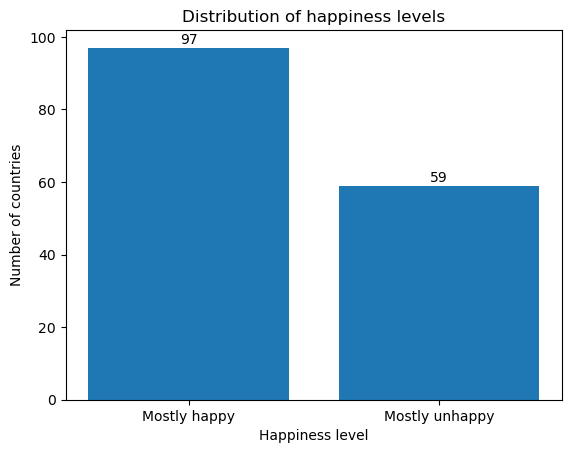

In [13]:
import matplotlib.pyplot as plt

# Count number of mostly happy and mostly unhappy countries
happy_count = len(happydata[happydata['happy'] == 1])
unhappy_count = len(happydata[happydata['happy'] == 0])

# Plot bar chart
fig, ax = plt.subplots()
ax.bar(['Mostly happy', 'Mostly unhappy'], [happy_count, unhappy_count])
ax.set_xlabel('Happiness level')
ax.set_ylabel('Number of countries')
ax.set_title('Distribution of happiness levels')
for i, v in enumerate([happy_count, unhappy_count]):
    ax.text(i, v + 1, str(v), ha='center')

plt.show()

As per our bar chart, 97 out fo 156 countries (62%) are considered mostly happy. But we'll see that they're not evenly distributed across different regions of the world.

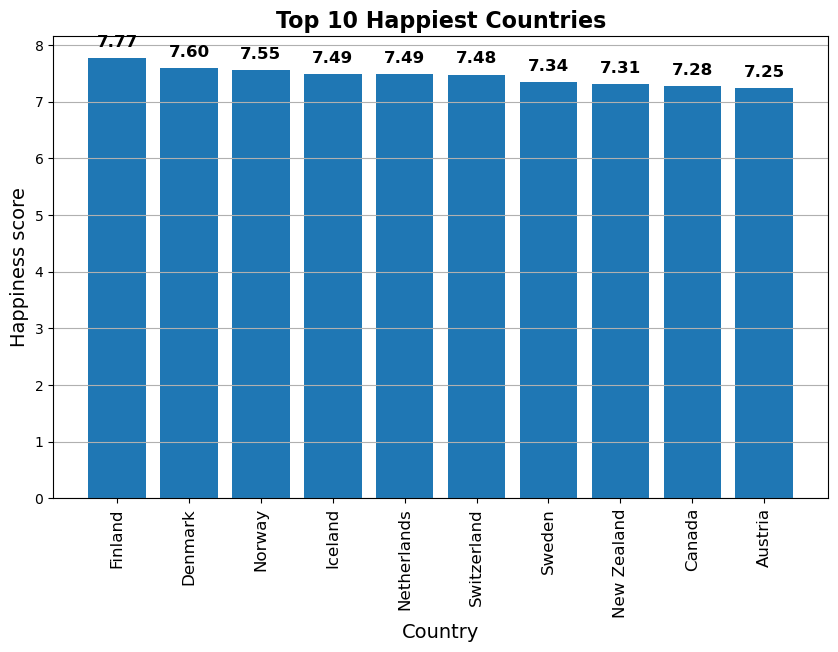

In [14]:
import matplotlib.pyplot as plt

# Select the top 10 happiest countries
top10 = happydata[['Country or region', 'Score']].nlargest(10, 'Score')

# Create a bar chart of the top 10 happiest countries
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top10['Country or region'], top10['Score'], color='#1f77b4')
for i, v in enumerate(top10['Score']):
    ax.text(i, v+0.2, f'{v:.2f}', ha='center', fontweight='bold', fontsize=12)
ax.set_xticks(range(len(top10['Country or region'])))
ax.set_xticklabels(top10['Country or region'], rotation=90, fontsize=12)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Happiness score', fontsize=14)
ax.set_title('Top 10 Happiest Countries', fontsize=16, fontweight='bold')
ax.grid(axis='y')
plt.savefig('top10_happiest_countries.png', dpi=300, bbox_inches='tight')
plt.show()

8 out of the 10 top happiest countries are in Europe. That can be traced back to a history of colonialism, where European nations explored several regions of the world and incresed the economic disparity. In the modern era, though, where colonialism isn't the main factor anymore, I can argue that their economic systems are more stable and the democratic institutions facilitate a social environment where happiness can flourish.

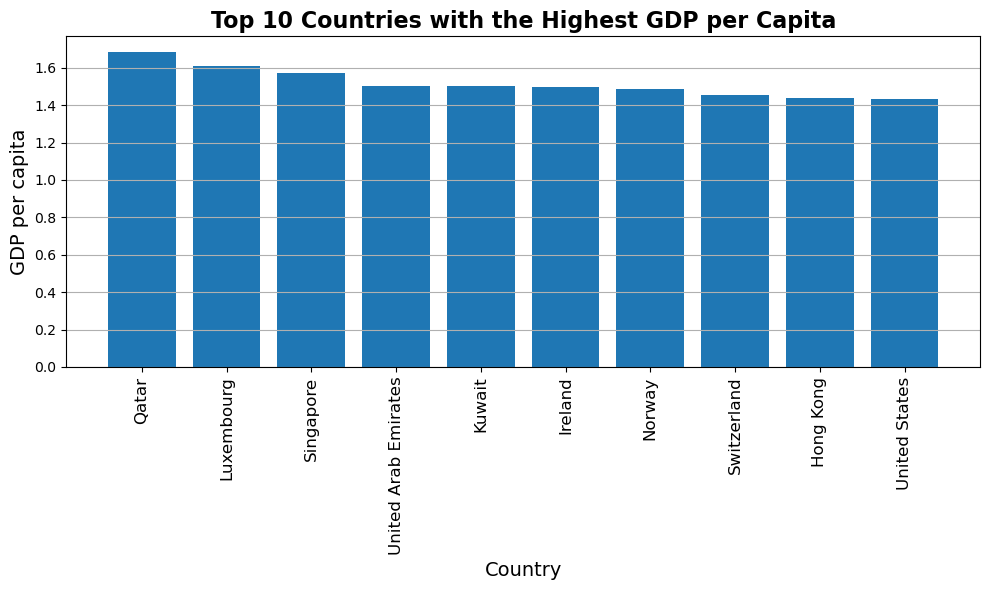

In [15]:
import matplotlib.pyplot as plt

# Select the top 10 countries with the highest GDP per capita
top10 = happydata[['Country or region', 'GDP per capita']].nlargest(10, 'GDP per capita')

# Create a bar chart of the top 10 countries with the highest GDP per capita
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top10['Country or region'], top10['GDP per capita'], color='#1f77b4')

# Set the x-axis tick locations and labels
ax.set_xticks(range(len(top10['Country or region'])))
ax.set_xticklabels(top10['Country or region'], rotation=90, fontsize=12)

# Set the axis labels and title
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('GDP per capita', fontsize=14)
ax.set_title('Top 10 Countries with the Highest GDP per Capita', fontsize=16, fontweight='bold')

# Add gridlines and save the chart
ax.grid(axis='y')
plt.tight_layout()
plt.savefig('top10_highest_gdp.png', dpi=300)
plt.show()

Finland, Denmark, and Norway constitute the top 3 happiest countries. We noticed a strong presence of Nordic and developed countries in the top 10. One would expect that most of the countries in the top 10 for GDP per capita would also make it to the top happy countries list, but that was not the case since only Norway and Switzerland are on both bar charts. It is interesting to see this because we can investigate how much money may not be a factor in a country's perceived levels of happiness.

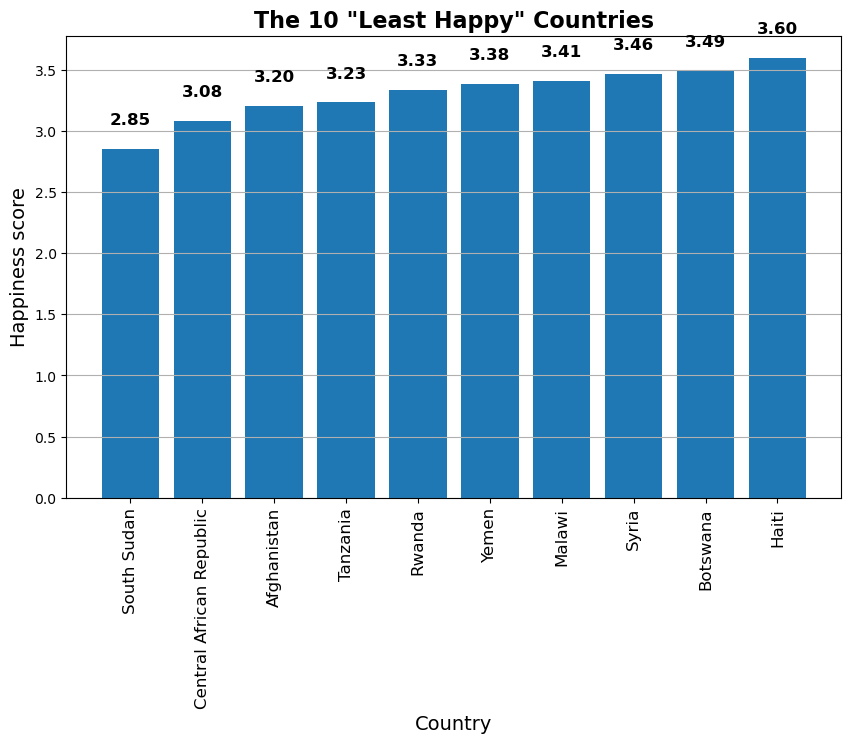

In [16]:
import matplotlib.pyplot as plt

# Select the bottom 10 happiest countries
bottom10 = happydata[['Country or region', 'Score']].nsmallest(10, 'Score')

# Create a bar chart of the bottom 10 happiest countries
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(bottom10['Country or region'], bottom10['Score'], color='#1f77b4')
for i, v in enumerate(bottom10['Score']):
    ax.text(i, v+0.2, f'{v:.2f}', ha='center', fontweight='bold', fontsize=12)
ax.set_xticks(range(len(bottom10['Country or region'])))
ax.set_xticklabels(bottom10['Country or region'], rotation=90, fontsize=12)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Happiness score', fontsize=14)
ax.set_title('The 10 "Least Happy" Countries', fontsize=16, fontweight='bold')
ax.grid(axis='y')
plt.savefig('bottom10_happiest_countries.png', dpi=400, bbox_inches='tight')
plt.show()

- South Sudan is the most unhappy country according to this bar chart.
- Mostly African nations and other developing countries make it to the bottom 10 of our ranking. Again, that traces back to a complicated history of political instabilty and colonialism that affected many of these countries and made it hard for them to catch up to modern world happiness standards established by a Western organization, namely the United Nations.

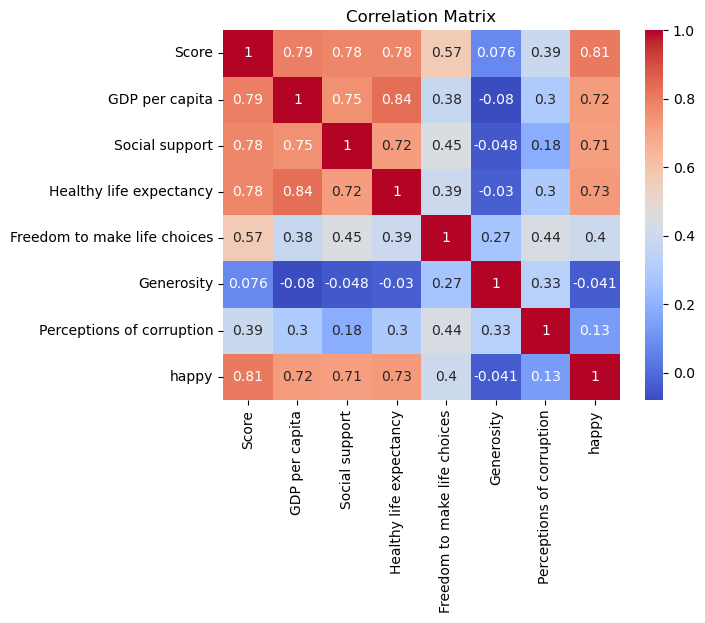

In [17]:
# Create a heatmap of the correlation matrix
corr = happydata.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From this corrrelation heatmap, where each cell is color-coded and darker shades of red suggest stronger correlation and darker shades of blue suggest weaker correlation, we can interpret that:
- Stronger correlation happens for Score vs. GDP per Capita, Score vs. Social Support, and Score vs. Healthy life expectancy
- In terms of the "happy" variable, we have higher correlation levels for GDP per capita, social support, and healthy life expectancy.
- Interestingly, Generosity, which is related to charity donations, does not really make a good correlations. Actually, the correlation with "happy" state is negative. That was a bit surprising to me since I imagined that more charity donations would "spread happiness."
- We're particularly interested in this, and we'll run a feature importance algorightm later on to gauge which features are more correlated in our analysis

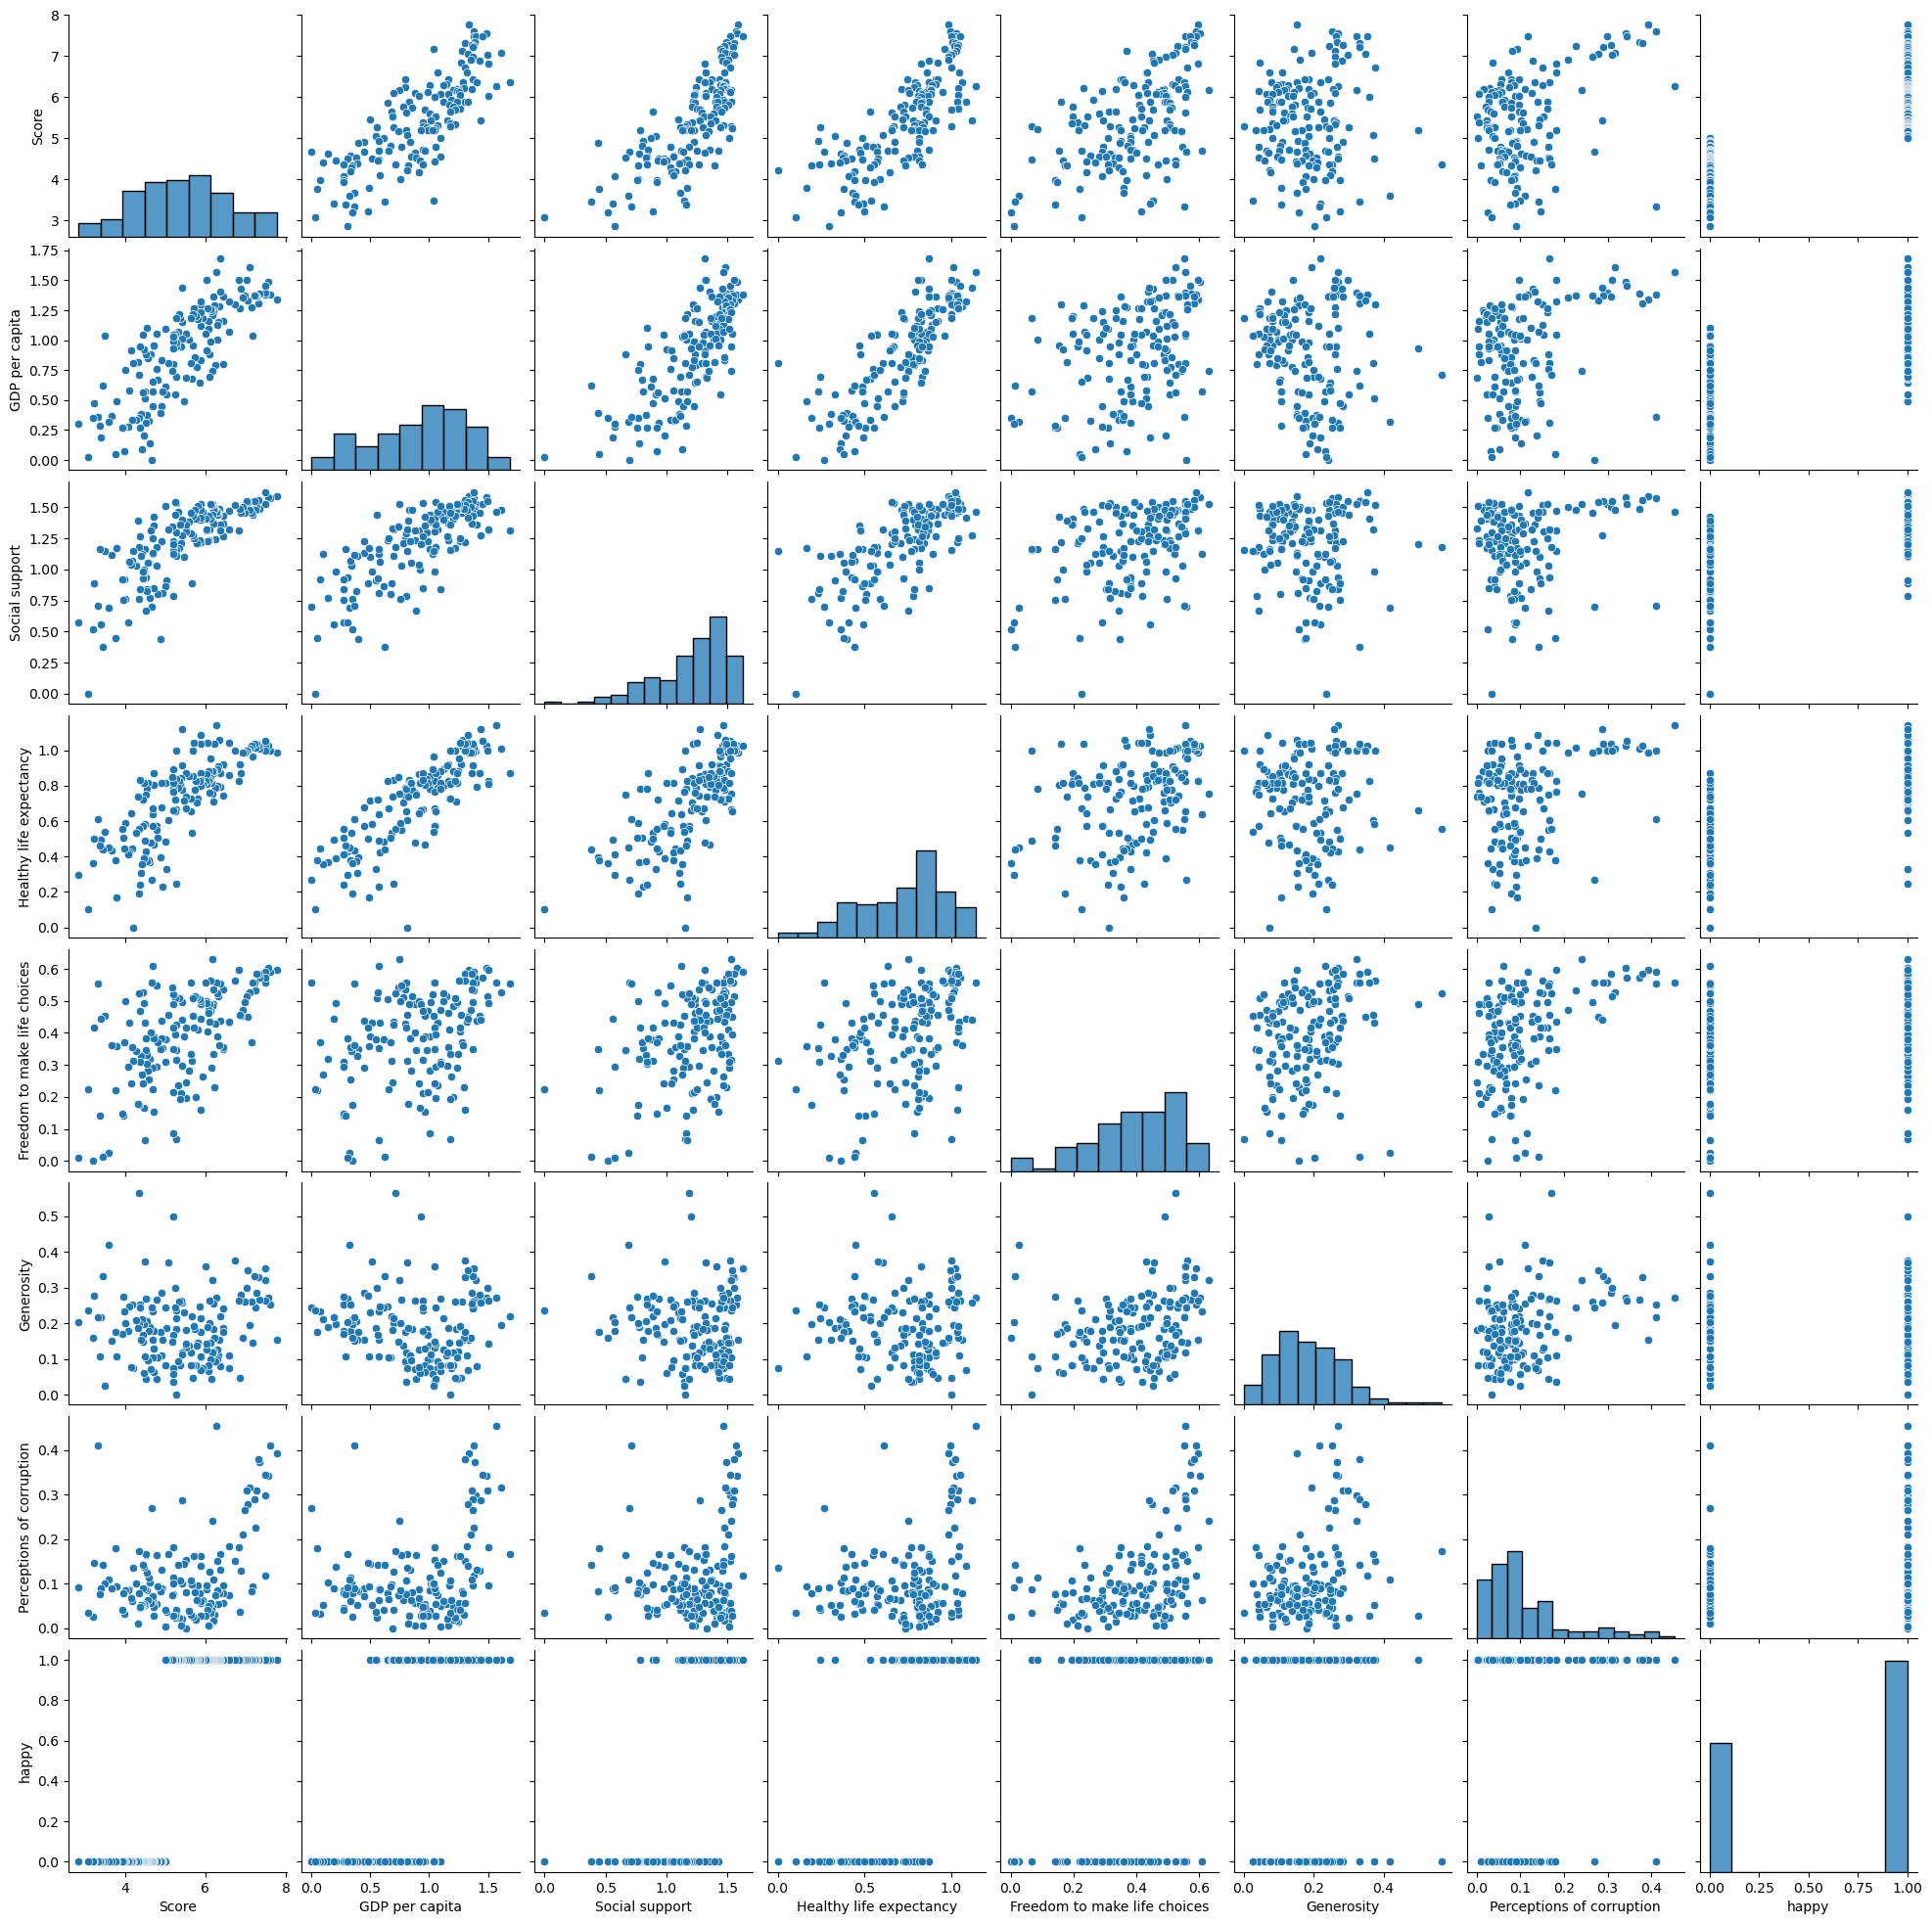

In [18]:
# Create a pair plot of the numeric variables
sns.pairplot(happydata.select_dtypes(include='number'))
plt.show()

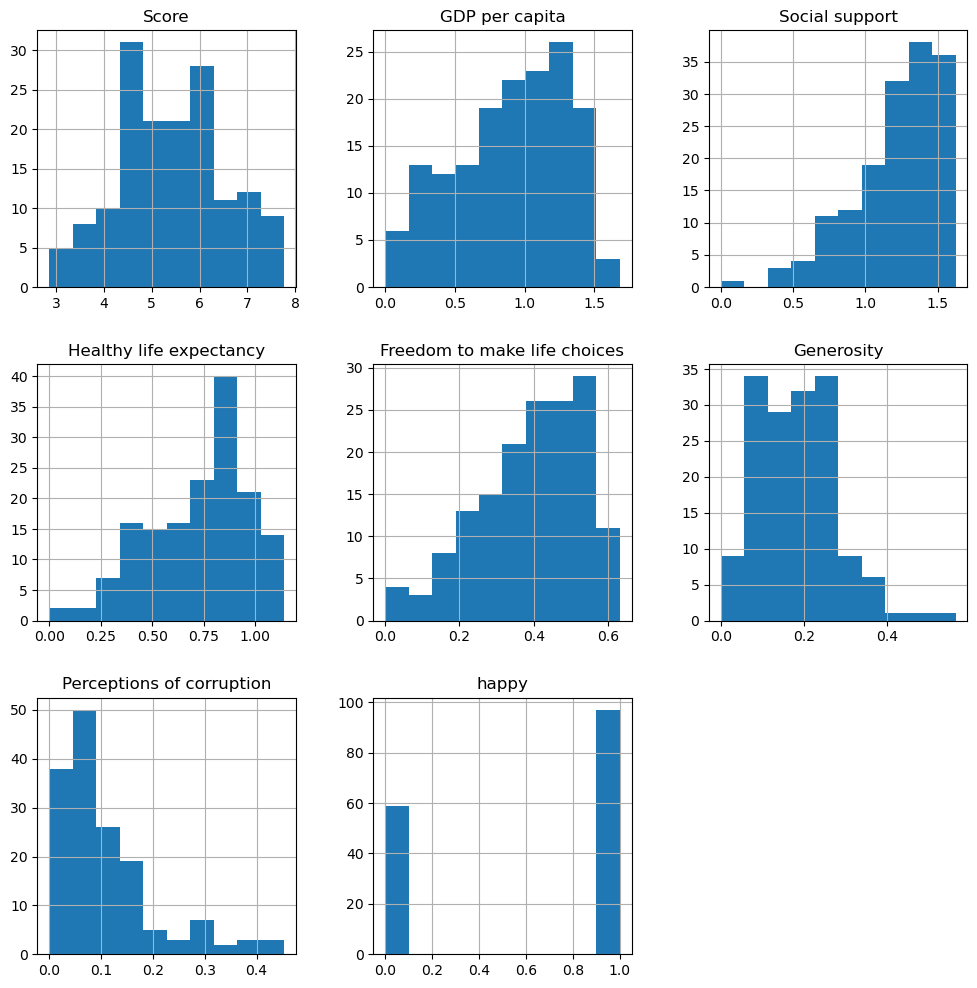

In [19]:
# Creating a Histogram
happydata.hist(figsize=(12, 12))
plt.show()

Again, interesting to point to features like Social support and perception of corruption are very skewed to one side of the histograms. A possible attempt to explain this would be to acknowledge that different countries have distinct levels of political stability and individualism/collectivism, and both of these factors can influence these two varibles. The more collectivist a society is, as far as I can deduce from my International Studies classes, the higher the chances of finding higher levels of social support since the social assistance network of friends and family is more nourished.

## Shapiro-Wilk test and decision-making for model selection

In [20]:
# Select only the numeric columns
numeric_columns = happydata.select_dtypes(include=np.number).columns

# Perform the Shapiro-Wilk test on each numeric column and print the results
print("Shapiro-Wilk Test Results:")
for column in numeric_columns:
    shapiro_test = stats.shapiro(happydata[column])
    print(f"{column} - Test Statistic: {shapiro_test[0]:.4f}, p-value: {shapiro_test[1]:.4f}")

Shapiro-Wilk Test Results:
Score - Test Statistic: 0.9872, p-value: 0.1633
GDP per capita - Test Statistic: 0.9653, p-value: 0.0006
Social support - Test Statistic: 0.9074, p-value: 0.0000
Healthy life expectancy - Test Statistic: 0.9534, p-value: 0.0000
Freedom to make life choices - Test Statistic: 0.9543, p-value: 0.0001
Generosity - Test Statistic: 0.9639, p-value: 0.0004
Perceptions of corruption - Test Statistic: 0.8228, p-value: 0.0000
happy - Test Statistic: 0.6145, p-value: 0.0000


By performing the Shapiro-Wilk test on the numeric columns, we are trying to see whether the features in our dataframe suggest normality of distribution. A p-value smaller than 0.05 (percentage for the hypothesis test) and test statistic closer to 1 both suggest evidence against normality, or evidence in favor of our alternative hypothesis (that the particular feature is NOT normally distributed
- Overall rank: the data is not normally distributed, as the p-value is less than 0.05 (the common significance level used for hypothesis testing).
- Score: the data is approximately normally distributed, as the p-value is greater than 0.05.
- GDP per capita: the data is not normally distributed, as the p-value is less than 0.05.
- Social support: the data is not normally distributed, as the p-value is less than 0.05.
- Healthy life expectancy: the data is not normally distributed, as the p-value is less than 0.05.
- Freedom to make life choices: the data is not normally distributed, as the p-value is less than 0.05.
- Generosity: the data is not normally distributed, as the p-value is less than 0.05.
- Perceptions of corruption: the data is not normally distributed, as the p-value is less than 0.05.

The Shapiro-Wilk test results show that most of the variables do not follow a normal distribution, as their p-values are below the common threshold of 0.05. The only variable with a p-value above 0.05 is the "Score" variable, which suggests that it might be normally distributed.

### Takeaways from this test

- Since most variables are in non-normal distribution, we need robust classification models later on, such as:
    - Decision Trees
    - Random Forests
    - Support Vector Machines (SVM)
- We will be using those, but I will also use a Logistic Regression since it is also commonly used for binary classification problems.
- Outliers might help explain the non-normality, but I will choose to still keep them nonetheless since our dataset is already small, and every country can be significant, even if their features present outliers.

## Model Preparation

From the Shapiro-Wilk statistical test, I have decided to implement Logistic Regression, Decision Trees, Random Forests, and SVMs for this data analytics project. I acknowledge that other models like KNN would be intersting, but I will keep my analysis limited to these models for now.

### Scaling the data

In [21]:
# Select the numeric columns to scale
numeric_columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the numeric columns
happydata[numeric_columns] = scaler.fit_transform(happydata[numeric_columns])

- StandardScaler is a popular choice for scaling numerical data
- It transforms data to have mean 0 and standard deviation 1, ensuring centered and consistent scale
- Useful for machine learning models sensitive to input feature scale, like regression and clustering models
- Robust to outliers that can skew results of other scaling methods
- Widely used and supported in popular machine learning libraries like Scikit-learn

### Preparing for classification

In [22]:
X = happydata.drop(['Country or region', 'Score', 'happy'], axis=1)
y = happydata['happy']

Establishing our target varibale and our indepedent variables

### Train-test split

In [23]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Here we see the importance of including a validation set in our train-test split data science technique to avoid the issue of data leakage.

### Logistic Regression 

In [24]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_val_pred = logreg.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_test_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')

print('\nClassification Report for the Logistic Regression:')
print(classification_report(y_test, y_test_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

Validation Accuracy: 0.87
Test Accuracy: 1.00

Classification Report for the Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24


Confusion Matrix:
[[10  0]
 [ 0 14]]


### Decision Trees, Random Forests, and Support Vector Machine

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [27]:
models = {'Decision Tree': dt, 'Random Forest': rf, 'SVM': svm}

for name, model in models.items():
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f'{name} Validation Accuracy: {val_accuracy:.2f}')

Decision Tree Validation Accuracy: 0.87
Random Forest Validation Accuracy: 0.91
SVM Validation Accuracy: 0.91


In [28]:
for name, model in models.items():
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'{name} Test Accuracy: {test_accuracy:.2f}')

    print('\nClassification Report:')
    print(classification_report(y_test, y_test_pred))

    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, y_test_pred))
    print('\n' + '=' * 80 + '\n')

Decision Tree Test Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.93      0.93      0.93        14

    accuracy                           0.92        24
   macro avg       0.91      0.91      0.91        24
weighted avg       0.92      0.92      0.92        24


Confusion Matrix:
[[ 9  1]
 [ 1 13]]


Random Forest Test Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.93      0.96        14

    accuracy                           0.96        24
   macro avg       0.95      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24


Confusion Matrix:
[[10  0]
 [ 1 13]]


SVM Test Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    

Logistic Regression:
- Validation Accuracy: 87%
- Test Accuracy: 100%
- Precision, recall, and F1-score are all 100%.
- The confusion matrix shows 10 true negatives (TN), 0 false positives (FP), 0 false negatives (FN), and 14 true positives (TP).

Decision Tree:
- Test Accuracy: 92%
- Precision, recall, and F1-score are all around 90% to 93%.
- The confusion matrix shows 9 true negatives (TN), 1 false positive (FP), 1 false negative (FN), and 13 true positives (TP).

Random Forest:
- Test Accuracy: 96%
- Precision, recall, and F1-score are all around 91% to 100%.
- The confusion matrix shows 10 TN, 0 FP, 1 FN, and 13 TP.

SVM:
- Test Accuracy: 100%
- Precision, recall, and F1-score are all 100%.
- The confusion matrix shows 10 TN, 0 FP, 0 FN, and 14 TP.

Overall, the SVM model outperforms the Decision Tree and Random Forest models, achieving perfect accuracy and performance metrics on the test set. Both the SVM and Logistic Regression models achieve perfect accuracy and performance metrics on the test set. The Random Forest model also performs well, while the Decision Tree model has slightly lower accuracy and performance metrics compared to the other three models.

### Random Forests and Feature importance

In [29]:
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(feature_importances)

Healthy life expectancy         0.277013
GDP per capita                  0.271488
Social support                  0.235824
Freedom to make life choices    0.096983
Perceptions of corruption       0.070917
Generosity                      0.047775
dtype: float64


An initial attempt at getting feature importance, and for this I used Random Forests as the base algorithm. Even though it was not our most effective model, it's worth trying that too for comparison.
- Healthy life expectancy and GDP per capita have the highest feature importance with percentages over 27%. This could help us expand our project later with feature engineering and it also allows us to make better decisions based on the features that contribute the most to happiness.

### SVM and Logistic Regression as tools for Feature Importance

Now, let's see what the calculation of feature importance will yield based on our top 2 performing models.

In [30]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Train a linear SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Get the feature importances for SVM and Logistic Regression
svm_importances = svm.coef_[0]  # assuming a binary classification problem
lr_importances = lr.coef_[0]

# Create Series objects with the feature importances
svm_feature_importances = pd.Series(svm_importances, index=X_train.columns).sort_values(ascending=False)
lr_feature_importances = pd.Series(lr_importances, index=X_train.columns).sort_values(ascending=False)

# Print the feature importances
print("SVM Feature Importances:")
print(svm_feature_importances)
print("\nLogistic Regression Feature Importances:")
print(lr_feature_importances)


SVM Feature Importances:
Healthy life expectancy         1.132239
Social support                  0.960316
Freedom to make life choices    0.251006
GDP per capita                  0.066844
Generosity                     -0.074177
Perceptions of corruption      -0.185951
dtype: float64

Logistic Regression Feature Importances:
Social support                  1.161246
GDP per capita                  1.075357
Healthy life expectancy         0.943733
Freedom to make life choices    0.524168
Generosity                     -0.046746
Perceptions of corruption      -0.190370
dtype: float64


Very interesting results here.

**SVM Feature Importances:**

- Healthy life expectancy: 1.132239 - This is the most important feature for the SVM model. A higher coefficient value indicates that the healthy life expectancy has the most significant positive impact on the target variable.
- Social support: 0.960316 - This is the second most important feature. A higher social support has a positive impact on the target variable.
- Freedom to make life choices: 0.251006 - This feature also has a positive impact on the target variable, but its influence is smaller compared to healthy life expectancy and social support.
- GDP per capita: 0.066844 - This feature has a small positive impact on the target variable.
- Generosity: -0.074177 - Generosity has a small negative impact on the target variable, meaning that higher values of generosity may slightly decrease the target variable.
- Perceptions of corruption: -0.185951 - This feature has a negative impact on the target variable, indicating that higher perceptions of corruption may decrease the target variable.

**Logistic Regression Feature Importances:**

- Social support: 1.161246 - This is the most important feature for the Logistic Regression model. A higher coefficient value indicates that social support has the most significant positive impact on the target variable.
- GDP per capita: 1.075357 - This is the second most important feature. A higher GDP per capita has a positive impact on the target variable.
- Healthy life expectancy: 0.943733 - This feature also has a positive impact on the target variable, but its influence is smaller compared to social support and GDP per capita.
- Freedom to make life choices: 0.524168 - This feature has a positive impact on the target variable as well.
- Generosity: -0.046746 - Generosity has a small negative impact on the target variable, meaning that higher values of generosity may slightly decrease the target variable.
- Perceptions of corruption: -0.190370 - This feature has a negative impact on the target variable, indicating that higher perceptions of corruption may decrease the target variable.

In conclusion, both SVM and Logistic Regression models consider Healthy life expectancy and Social support as the top two important features. However, their ranking is different, and the coefficients may vary. Similarly, both models consider Perceptions of corruption and Generosity as having negative impacts on the target variable.

## Final Analysis and Actionable Steps

Throughout this final project, I have carried out data cleaning and preparation, Exploratory Data Analysis (EDA) and machine learning algorithms to correctly classify a country as _happy_ or _unhappy_ based on several features from the 2019 World Happiness Report dataset. I have implemented the following chosen classification algorithms: Logistic Regression, Decision Trees, Random Forests, and Support Vector Machine (SVM). The best performing models were the SVM (first) and the Logistic Regression (second). The other two models probably did not work as well since they are more prone to overfitting and because this dataset is relatively small since it's related to social studies applied to international politics. Therefore, this was an enriching data science experience since it helped me understand why some machine learning models may be more suitable according to the task at hand that comes with our particular dataset.

Overall, I can point to the following:
- SVM and Logistic Regression predicted really well which countries would be "happy" in our dataset (100% precision on the testing set, hence an incredible ability to predict unseen, new data). Still, a future direction for this project would be to implement other algorithms, like Neural Networks and PCA, and I believe that a more complex study using datasets from several years in the 2010s + pandemic era could be interesting through a Time Series analysis. These are ways that this project could be scalable.
    - Hyperparameter tuning could be another way to improve even more my models, but there were some challenges I faced while trying to implement it. That would be another direction for me to learn and grow.
- Feature importance algorithms repeatedly indicated that features such as Healthy Life Expectancy and Social support to be of utmost importance to predict happiness in a country. This can indicate that financial factors like the adjusted GDP per capita and many countries' obsession with mere economic growth might not be the answers to making their citizens happier.
    - With that in mind, I'd recommend more investment in mental health democratization initatives and more investment in public healthcare sytems that can reach the low-income populations who often struggle to access high-quality healthcare. 
    - Since this dataset is released yearly by the United Nations, I would say that this international institution should work more on raising awareness through data-driven recommendations to urge nations to act now. Mental health issues tend to get in the way of people feeling happy even in wealthy nations like the United States, therefore issues like this deserve more governmental attention.

## Acknowledgements

I'd like to thank Dr. Allen for helping me develop my data science skills this Spring of 2023 with this carefully designed DSC 305 course. I have learned a lot this semester, and I realized that even though this field is very hard to grasp sometimes, it can also be extremely rewarding too. Also, I'm grateful for Dr. Zhang's support particularly with this project. His suggestions made this project take a better shape for my classification models.

## References

Helliwell, J., Layard, R., & Sachs, J. (2019). World Happiness Report 2019. Retrieved from https://worldhappiness.report/ed/2019/changing-world-happiness/#fnref20

Helliwell, J., Layard, R., & Sachs, J. (2019). World Happiness Report 2019: Appendix 1. Retrieved from https://s3.amazonaws.com/happiness-report/2019/WHR19_Ch2A_Appendix1.pdf

PromptCloudHQ. (2019). World Happiness Report 2019 [Dataset]. Retrieved from https://www.kaggle.com/datasets/PromptCloudHQ/world-happiness-report-2019

Scikit-learn. (n.d.). Scikit-learn: Machine Learning in Python. Retrieved from https://scikit-learn.org/stable/index.html

Pandas. (n.d.). pandas: Powerful data structures for data analysis, time series, and statistics. Retrieved from https://pandas.pydata.org/

Seaborn. (n.d.). Seaborn: Statistical data visualization. Retrieved from https://seaborn.pydata.org/

McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.). O'Reilly Media.

VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media. Retrieved from https://jakevdp.github.io/PythonDataScienceHandbook/

Raschka, S., & Mirjalili, V. (2019). Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2 (3rd ed.). Packt Publishing.